In [90]:
! pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:
# Import The Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [92]:
# Import The Dataset
df = pd.read_csv('OnlineRetail.csv', encoding = 'unicode_escape')

In [93]:
df.shape

(541909, 8)

In [94]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [95]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [96]:
df = df[df['CustomerID'].notna()]
# Sample the dataset
df_fix = df.sample(10000, random_state = 42)

In [97]:
df_fix.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [98]:
df['TotalPrice']=df_fix['UnitPrice']*df_fix['Quantity']

In [99]:
# Step 2: Feature Engineering
customer_amount = df.groupby('CustomerID')['TotalPrice'].sum()
customer_amount.head()

CustomerID
12346.0      0.00
12347.0    133.20
12348.0    120.88
12349.0    312.75
12350.0      0.00
Name: TotalPrice, dtype: float64

In [100]:
customer_frequency=df_fix.groupby('CustomerID')['InvoiceNo'].count()
customer_data.head()

CustomerID
12347    5
12348    2
12349    2
12352    5
12354    2
Name: InvoiceNo, dtype: int64

In [101]:
# Merging the two dfs

new_df = pd.merge(customer_amount, customer_frequency, on='CustomerID', how='inner')
new_df.head()

,TotalPrice,InvoiceNo
CustomerID,,
12347.0,133.20,5
12348.0,120.88,2
12349.0,312.75,2
12352.0,80.85,5
12354.0,33.30,2


In [102]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [103]:
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [104]:
# Compute the difference between max date and transaction date

df['Diff'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,NaN,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,NaN,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN,373 days 04:24:00


In [105]:
# Compute last transaction date to get the recency of customers

customer_transaction = df.groupby('CustomerID')['Diff'].min()
customer_transaction = customer_transaction.reset_index()
customer_transaction.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [106]:
 #Extract number of days only

df['Diff'] = df['Diff'].dt.days
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,NaN,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,NaN,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN,373


In [107]:
# Compute last transaction date to get the recency of customers

customer_transaction = df.groupby('CustomerID')['Diff'].min()
customer_transaction = customer_transaction.reset_index()
customer_transaction.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [108]:
# Merging the two dfs

customer_features = pd.merge(new_df,customer_transaction, on='CustomerID', how='inner')
customer_features.head()

,CustomerID,TotalPrice,InvoiceNo,Diff
0,12347.0,133.20,5,1
1,12348.0,120.88,2,74
2,12349.0,312.75,2,18
3,12352.0,80.85,5,35
4,12354.0,33.30,2,231


In [109]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features)

In [110]:
# Determine optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

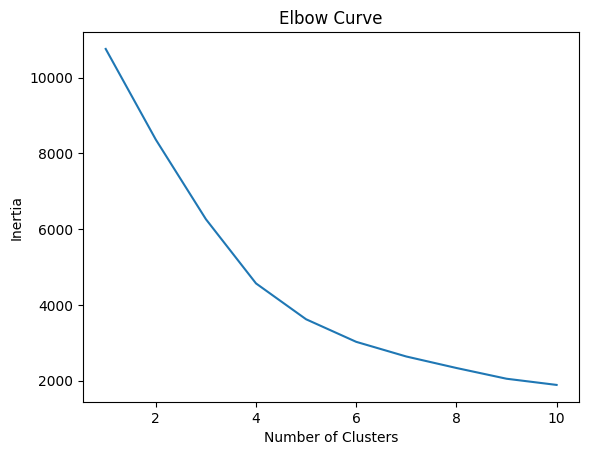

In [111]:
# Plot elbow curve to identify optimal number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [112]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_features)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


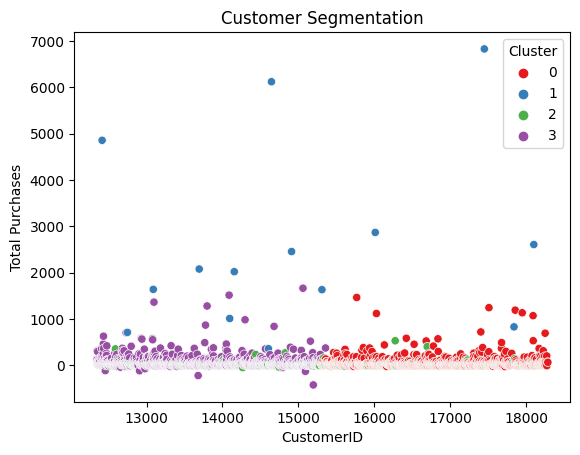

In [113]:
import seaborn as sns
# Add cluster labels to the DataFrame
customer_features['Cluster'] = labels

# Step 4: Visualization
sns.scatterplot(data=customer_features, x='CustomerID', y='TotalPrice', hue='Cluster', palette='Set1')
plt.title('Customer Segmentation')
plt.xlabel('CustomerID')
plt.ylabel('Total Purchases')
plt.show()

When you perform clustering on customer purchasing data, you can gain insights into distinct segments or groups of customers with similar purchasing patterns. These segments can help you understand different customer behaviors, preferences, or needs, enabling you to tailor your marketing strategies and offerings accordingly.

Here are a few potential segments that could emerge from the clustering analysis:

High-Value Customers:
This segment may consist of customers who make frequent purchases and spend a significant amount of money.
They may be loyal customers who contribute a substantial portion of the total revenue.
You can focus on retaining and incentivizing these customers through personalized offers, loyalty programs, or exclusive perks.
Low-Value Customers:
This segment may include customers who make infrequent or small purchases.
They might be occasional or price-sensitive shoppers.
You can target this segment with offers, promotions, or discounts to encourage more frequent purchases and increase their lifetime value.
Medium-Value Customers:
This segment could include customers who fall between the high-value and low-value segments in terms of their purchasing behavior.
They may have moderate purchase frequency and spending.
You can implement strategies to nurture and further engage these customers, such as personalized recommendations or upselling/cross-selling opportunities.
Keep in mind that the actual segments and their characteristics would depend on the specific patterns and behaviors present in your dataset. It's crucial to thoroughly analyze the results of the clustering analysis and interpret the segments in the context of your business objectives and domain knowledge.

I encourage you to explore the clustering results, analyze the characteristics of each segment, and adapt your marketing strategies and actions accordingly to better serve the needs of each segment of customers.
